In [12]:
import scipy as sp
import numpy as np
import qibo
from qibo.symbols import *
from qibo import hamiltonians
import matplotlib.pyplot as plt
from tqdm import tqdm

from functions import *

In [ ]:
def thermalStatePrepBest(beta, H, initState, method ='DBI', K = 1):
    tfd = TFD(beta, H, initState)
    for i in range(K):
        s = bestApproximatingStep(H, initState, beta/(2*K))
        if method == 'DBI':
            initState = DBI(1,H,s,initState)[-1]
        elif method == 'DBQITE':
            initState = DBQITE(1,H,s,initState)[-1]
        elif method == 'DBQITE_thirdOrder':
            initState = DBQITE_thirdOrder(1,H,s,initState)[-1]
    #fidelity = UJFidelity(tfd, initState)
    fidelity = Fidelity(tfd, initState)
    return fidelity


[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:12]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:13]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:46:13]: Calculating 

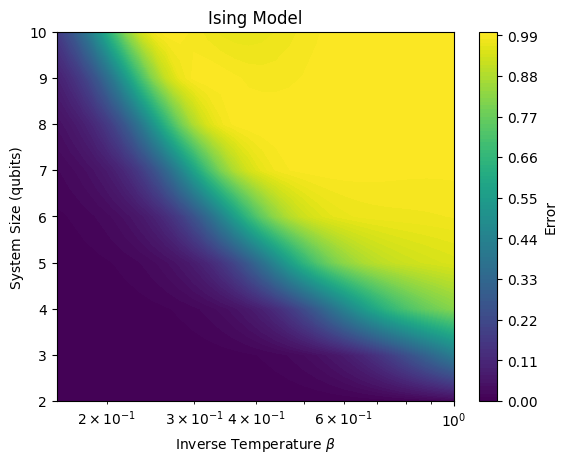

In [21]:
nqubits = [2,3,4,5,6,7,8,9,10]
beta = np.logspace(-0.8,0,30)
fidelity = np.zeros((len(nqubits), len(beta)))
for n in range(len(nqubits)):
    H_def = sum([X(x)-Z(x+1)*Z(x)   for x in range(nqubits[n]-1)])
    initState = np.ones(2**nqubits[n])/np.sqrt(2**nqubits[n])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = sp.sparse.csr_matrix(H)
    for b in range(len(beta)):
        fidelity[n,b] = thermalStatePrepBest(beta[b], H, initState, method = 'DBI', K = 1)

A, B = np.meshgrid(beta, nqubits)
plt.figure()
plt.title('Ising Model')
cp = plt.contourf(A, B, 1-fidelity, levels=100)
plt.colorbar(cp, label='Error')
plt.xlabel(r'Inverse Temperature $\beta$')
plt.ylabel('System Size (qubits)')
plt.xscale('log')
plt.show()

[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:07]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:08]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:09]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:47:13]: Calculating 

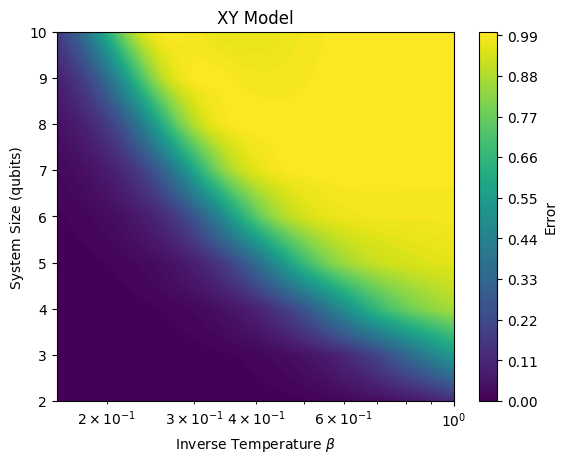

In [22]:
nqubits = [2,3,4,5,6,7,8,9,10]
beta = np.logspace(-0.8,0,30)
fidelity = np.zeros((len(nqubits), len(beta)))
for n in range(len(nqubits)):
    H_def = sum([X(x)*X(x+1) + Y(x)*Y(x+1)   for x in range(nqubits[n]-1)])
    initState = np.ones(2**nqubits[n])/np.sqrt(2**nqubits[n])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = sp.sparse.csr_matrix(H)
    for b in range(len(beta)):
        fidelity[n,b] = thermalStatePrepBest(beta[b], H, initState, method = 'DBI', K = 1)

A, B = np.meshgrid(beta, nqubits)
plt.figure()
plt.title('XY Model')
cp = plt.contourf(A, B, 1-fidelity, levels=100)
plt.colorbar(cp, label='Error')
plt.xlabel(r'Inverse Temperature $\beta$')
plt.ylabel('System Size (qubits)')
plt.xscale('log')
plt.show()

[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:42]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:43]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:44]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.
[Qibo 0.2.16|WARNING|2025-04-03 09:50:47]: Calculating 

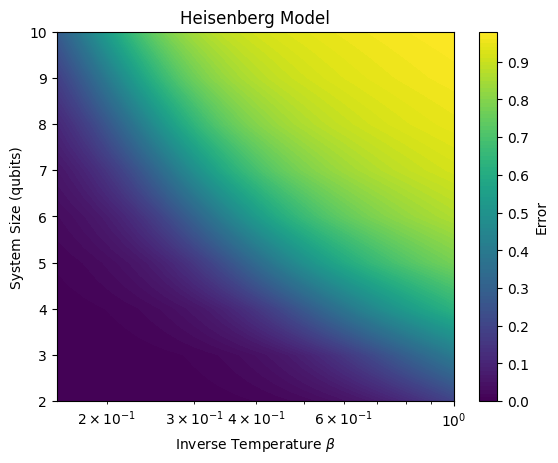

In [27]:
nqubits = [2,3,4,5,6,7,8,9,10]
beta = np.logspace(-0.8,0,30)
fidelity = np.zeros((len(nqubits), len(beta)))
for n in range(len(nqubits)):
    H_def = sum([X(x)*X(x+1)+Y(x)*Y(x+1)-Z(x)*Z(x+1)   for x in range(nqubits[n]-1)])
    initState = np.ones(2**nqubits[n])/np.sqrt(2**nqubits[n])
    H = hamiltonians.SymbolicHamiltonian(H_def).matrix
    H = sp.sparse.csr_matrix(H)
    for b in range(len(beta)):
        fidelity[n,b] = thermalStatePrepBest(beta[b], H, initState, method = 'DBI', K = 1)

A, B = np.meshgrid(beta, nqubits)
plt.figure()
plt.title('Heisenberg Model')
cp = plt.contourf(A, B, 1-fidelity, levels=100)
plt.colorbar(cp, label='Error')
plt.xlabel(r'Inverse Temperature $\beta$')
plt.ylabel('System Size (qubits)')
plt.xscale('log')
plt.show()